In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json

In [2]:
layer = 20

In [3]:
activations_path = f'data/activations/output_{layer}.json'
predictions_path = f'data/predictions/gemma_predictions_truthfulQA_1.csv'

In [4]:
def load_json(src_path):
    with open(src_path, 'r') as src_file:
        json_content = json.load(src_file)
    return json_content

In [5]:
def count_classes_predictions(predictions_path):
    predictions_df = pd.read_csv(predictions_path)
    predictions_count = predictions_df['prediction'].value_counts()
    return predictions_count.to_dict()

In [6]:
def find_num_components(activations):
    components = list(activations['yes'].keys()) + list(activations['no'].keys())
    components = [int(el) for el in components]
    max_comp = max(components) + 1
    return max_comp

In [7]:
def vectorize_activations(activations, num_components):
    activations_vector = np.zeros(num_components)
    for idx, act in activations.items():
        activations_vector[int(idx)] = act
    return activations_vector

In [8]:
def vectorize_and_normalize_label_activations(label, activations, predictions_count, num_components):
    label_activations = activations[label]
    label_predictions_count = predictions_count[label]
    label_activations = vectorize_activations(label_activations, num_components)
    label_activations /= label_predictions_count
    return label_activations

In [9]:
predictions_count = count_classes_predictions(predictions_path)
activations = load_json(activations_path)

In [10]:
num_components = 16384 # find_num_components(activations)
num_components

16384

In [11]:
yes_activations = vectorize_and_normalize_label_activations('yes', activations, predictions_count, num_components)
no_activations = vectorize_and_normalize_label_activations('no', activations, predictions_count, num_components)

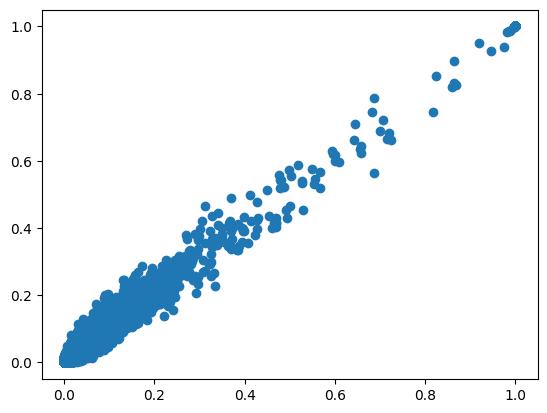

In [12]:
plt.scatter(x=yes_activations, y=no_activations)
plt.show()